In [1]:
import pandas as pd

# Attraction Data Collection By using Forsquare API

#### Collecting Hospitals

In [2]:
import requests
import csv
import math


api_key = "fsq33LvCZ9VsTENmbZMTPe9IOQe1AZcHfT+kbQvfFEqXhvQ="

# List of stations with their latitude and Longitude
stations = [
    {"name": "Riyadh Metro Station - Courts Complex", "latitude": 24.62611365, "Longitude": 46.71150243},
    {"name": "2G1 King Fahad Stadium", "latitude": 24.79301975, "Longitude": 46.83640293},
    {"name": "King Abdullah Financial District (KAFD)", "latitude": 24.76745, "Longitude": 46.64306},
    {"name": "Western Metro Station", "latitude": 24.58172196, "Longitude": 46.61477362},
    {"name": "Granada Center", "latitude": 24.78645839, "Longitude": 46.72914381},
    {"name": "Qasr al-Hokm", "latitude": 24.62859706, "Longitude": 46.71624689},
    {"name": "2A2 Riyadh Metro Station", "latitude": 24.71708353, "Longitude": 46.63876028},
    {"name": "2B1 Riyadh Metro Station", "latitude": 24.72404149, "Longitude": 46.65515435},
    {"name": "Riyadh Metro Station 6E1 - Al Yarmuk", "latitude": 24.79121174, "Longitude": 46.76626338},
    {"name": "Riyadh Metro Olaya STC Station", "latitude": 24.72669719, "Longitude": 46.66700206},
    {"name": "National Museum", "latitude": 24.64602702, "Longitude": 46.71467743},
    {"name": "Fast 4E1 Station", "latitude": 24.86021302, "Longitude": 46.70400756},
    {"name": "Riyadh Metro Station - MOE", "latitude": 24.74070436, "Longitude": 46.69476215},
    {"name": "Riyadh Airport Metro Station | Terminal 5", "latitude": 24.94062488, "Longitude": 46.71045292},
    {"name": "Riyadh metro station - Dr.soliman Al habib", "latitude": 24.81157969, "Longitude": 46.62569657},
    {"name": "1E2 Riyadh Metro Station - Passport Department", "latitude": 24.65947144, "Longitude": 46.70460924},
    {"name": "Riyadh Metro Station - King Salman Oasis", "latitude": 24.71696061, "Longitude": 46.63864341},
    {"name": "Riyadh Metro Station | SABIC", "latitude": 24.80681303, "Longitude": 46.70849702},
    {"name": "5B4 Metro station", "latitude": 24.70895017, "Longitude": 46.7078858},
    {"name": "Riyadh Metro Al Hilla Station", "latitude": 24.632132, "Longitude": 46.72122698},
    {"name": "Riyadh Metro Ministry of Finance Station", "latitude": 24.65138614, "Longitude": 46.71651628},
    {"name": "1G2 Riyadh Metro Station - Al Iman Hospital", "latitude": 24.74148527, "Longitude": 46.69465623},
    {"name": "Riyadh Metro King Fahad District Station", "latitude": 24.74557209, "Longitude": 46.65900466},
    {"name": "1B4 Metro station, Line 1, Riyadh Metro", "latitude": 24.72209407, "Longitude": 46.67109894},
    {"name": "Riyadh Metro Al Murooj Station 1A2", "latitude": 24.75521355, "Longitude": 46.65417848},
    {"name": "2C1 Riyadh Metro Station - King Abdulaziz Road", "latitude": 24.73705565, "Longitude": 46.68543104},
    {"name": "Riyadh Metro Station - KhuraisÂ\xa0Road", "latitude": 24.74106149, "Longitude": 46.79833803},
    {"name": "5B2 Station Riyadh Metro Station - Officers Club", "latitude": 24.69817005, "Longitude": 46.71791768},
    {"name": "Riyadh Metro Station - ArÂ\xa0Rabi", "latitude": 24.78648129, "Longitude": 46.65998627},
    {"name": "RIYADH METRO 1C3 STATION", "latitude": 24.6969827, "Longitude": 46.68416572},
    {"name": "Riyadh Metro Station - Khalid Bin AkwakeedÂ\xa0Road", "latitude": 24.76794214, "Longitude": 46.75859446},
    {"name": "Riyadh Metro Station - 3A2", "latitude": 24.58587453, "Longitude": 46.5595733},
    {"name": "Riyadh Metro Station - Skirinah", "latitude": 24.61823799, "Longitude": 46.72475222},
    {"name": "Riyadh Metro East Depot", "latitude": 24.80005128, "Longitude": 46.83431076},
    {"name": "Metro station - SABB", "latitude": 24.83179928, "Longitude": 46.61544086},
    {"name": "Riyadh Metro Station - Jarir District", "latitude": 24.67349427, "Longitude": 46.76049176},
    {"name": "5A3 Station Riyadh Metro Station - Al Wizarat", "latitude": 24.6780533, "Longitude": 46.71912907},
    {"name": "Riyadh Metro Station - Sultanah", "latitude": 24.61505372, "Longitude": 46.68648626},
    {"name": "Riyadh Metro Station - Riyadh Exhibition Center", "latitude": 24.75570479, "Longitude": 46.7265571},
    {"name": "Riyadh Metro Station -Â\xa03B1", "latitude": 24.58437961, "Longitude": 46.58783303},
    {"name": "Riyadh Metro Ad Dar Al Baida Station", "latitude": 24.56079442, "Longitude": 46.77622548},
    {"name": "3D3 Riyadh Metro Station - Dhahrat Al Badiah", "latitude": 24.60738249, "Longitude": 46.65365092},
    {"name": "Riyadh Metro King Fahad Library Station", "latitude": 24.69123276, "Longitude": 46.68771327},
    {"name": "Riyadh Metro Station - Ad Dhabab", "latitude": 24.70979229, "Longitude": 46.70758579},
    {"name": "Riyadh Metro Station - Harun Ar RasheedÂ\xa0Road", "latitude": 24.68788039, "Longitude": 46.79664862},
    {"name": "3J1 & 6H2 Riyadh Metro Station - An Naseem", "latitude": 24.70337375, "Longitude": 46.8282508},
    {"name": "Riyadh Metro Station - An Nuzhah", "latitude": 24.7486496, "Longitude": 46.71365592},
    {"name": "Riyadh Metro Station - Al Hamra", "latitude": 24.77748191, "Longitude": 46.77594448},
    {"name": "1F8 Riyadh Metro Station - AlÂ\xa0Owd", "latitude": 24.62610185, "Longitude": 46.72165469},
    {"name": "1Z1-SR0(1SS1) Riyadh Metro (Amoudi's sub-station)", "latitude": 24.7900654, "Longitude": 46.6369969},
    {"name": "Riyadh Metro Station - First IndustrialÂ\xa0City", "latitude": 24.64784906, "Longitude": 46.73933343},
    {"name": "King Saud University Station", "latitude": 24.71382487, "Longitude": 46.62944847},
    {"name": "3C2 Riyadh Metro Station - Aishah bint Abi Bakr Street", "latitude": 24.60288618, "Longitude": 46.64322618},
    {"name": "4C1 Station Fast", "latitude": 24.80324989, "Longitude": 46.69551173},
    {"name": "Riyadh Metro Al Muorabba Station", "latitude": 24.66643309, "Longitude": 46.70154176},
    {"name": "Riyadh Metro Railway Station", "latitude": 24.64938479, "Longitude": 46.7406384},
    {"name": "3G2 Riyadh Metro Station - Al Rajhi Grand Mosque", "latitude": 24.68022078, "Longitude": 46.7794917},
    {"name": "2E2 Riyadh Metro Station - Al Khaleej", "latitude": 24.78185083, "Longitude": 46.79392441},
    {"name": "Riyadh Metro Station | Terminal 3 & 4", "latitude": 24.9559949, "Longitude": 46.70258193},
    {"name": "Riyadh Metro Station | Terminal 1 & 2", "latitude": 24.96155833, "Longitude": 46.6988622},
    {"name": "1J1 Riyadh Metro Station - Al Aziziyah", "latitude": 24.58754306, "Longitude": 46.76062512},
    {"name": "3K1 Station Riyadh Metro", "latitude": 24.72328835, "Longitude": 46.86109258},
    {"name": "Riyadh Metro Station - Transportation Center", "latitude": 24.60013184, "Longitude": 46.74423471},
    {"name": "Manfuha station", "latitude": 24.61022761, "Longitude": 46.72630868},
    {"name": "Riyadh Metro Al Bat'ha Station", "latitude": 24.63917037, "Longitude": 46.7147258}
]

radius = 5000  # in meters
query = "hospital, clinic, medical center, healthcare, health clinic"

# Foursquare API endpoint and headers
url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Accept": "application/json",
    "Authorization": api_key,
}

# Function to calculate the distance in meters between two lat/long points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Open a CSV file to save the results
with open("education_dis.csv", mode="w", newline='', encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    # Write header row with added columns for distance and duration
    writer.writerow(["Station", "Station Latitude", "Station Longitude", "Name", "Address", "Latitude", "Longitude", "Distance (m)", "Walking Duration (min)"])
    
    # Loop through each station
    for station in stations:
        station_name = station["name"]
        latitude = station["latitude"]
        Longitude = station["Longitude"]
        
        # Set up parameters for this station
        params = {
            "ll": f"{latitude},{Longitude}",
            "radius": radius,
            "query": query,
            "limit": 2  
        }
        
        # Make the API request
        response = requests.get(url, headers=headers, params=params)
        
        # Process the response for each station
        if response.status_code == 200:
            attractions = response.json().get("results", [])
            for place in attractions:
                name = place.get("name")
                location = place.get("location", {})
                address = location.get("formatted_address", "Address not available")
                lat = place.get("geocodes", {}).get("main", {}).get("latitude")
                lon = place.get("geocodes", {}).get("main", {}).get("Longitude")
                
                # Calculate distance and duration if lat/lon are available
                if lat is not None and lon is not None:
                    distance = calculate_distance(latitude, Longitude, lat, lon)
                    walking_duration = round(distance / 83.33)  # 83.33 meters per minute (5 km/h walking speed)
                else:
                    distance = None
                    walking_duration = None
                
                # Write the row to the CSV with distance and duration
                writer.writerow([station_name, latitude, Longitude, name, address, lat, lon, distance, walking_duration])
                
            print(f"Data for {station_name} saved.")
        else:
            print(f"Failed to fetch data for {station_name}. Status code: {response.status_code}")

print("Data collection complete. Results saved to station_education_last_last.csv")


Data for Riyadh Metro Station - Courts Complex saved.
Data for 2G1 King Fahad Stadium saved.
Data for King Abdullah Financial District (KAFD) saved.
Data for Western Metro Station saved.
Data for Granada Center saved.
Data for Qasr al-Hokm saved.
Data for 2A2 Riyadh Metro Station saved.
Data for 2B1 Riyadh Metro Station saved.


KeyboardInterrupt: 

#### Collecting Entertaiments

In [ ]:
api_key = "fsq33LvCZ9VsTENmbZMTPe9IOQe1AZcHfT+kbQvfFEqXhvQ="

# List of stations with their latitude and Longitude
stations = [
    {"name": "Riyadh Metro Station - Courts Complex", "latitude": 24.62611365, "Longitude": 46.71150243},
    {"name": "2G1 King Fahad Stadium", "latitude": 24.79301975, "Longitude": 46.83640293},
    {"name": "King Abdullah Financial District (KAFD)", "latitude": 24.76745, "Longitude": 46.64306},
    {"name": "Western Metro Station", "latitude": 24.58172196, "Longitude": 46.61477362},
    {"name": "Granada Center", "latitude": 24.78645839, "Longitude": 46.72914381},
    {"name": "Qasr al-Hokm", "latitude": 24.62859706, "Longitude": 46.71624689},
    {"name": "2A2 Riyadh Metro Station", "latitude": 24.71708353, "Longitude": 46.63876028},
    {"name": "2B1 Riyadh Metro Station", "latitude": 24.72404149, "Longitude": 46.65515435},
    {"name": "Riyadh Metro Station 6E1 - Al Yarmuk", "latitude": 24.79121174, "Longitude": 46.76626338},
    {"name": "Riyadh Metro Olaya STC Station", "latitude": 24.72669719, "Longitude": 46.66700206},
    {"name": "National Museum", "latitude": 24.64602702, "Longitude": 46.71467743},
    {"name": "Fast 4E1 Station", "latitude": 24.86021302, "Longitude": 46.70400756},
    {"name": "Riyadh Metro Station - MOE", "latitude": 24.74070436, "Longitude": 46.69476215},
    {"name": "Riyadh Airport Metro Station | Terminal 5", "latitude": 24.94062488, "Longitude": 46.71045292},
    {"name": "Riyadh metro station - Dr.soliman Al habib", "latitude": 24.81157969, "Longitude": 46.62569657},
    {"name": "1E2 Riyadh Metro Station - Passport Department", "latitude": 24.65947144, "Longitude": 46.70460924},
    {"name": "Riyadh Metro Station - King Salman Oasis", "latitude": 24.71696061, "Longitude": 46.63864341},
    {"name": "Riyadh Metro Station | SABIC", "latitude": 24.80681303, "Longitude": 46.70849702},
    {"name": "5B4 Metro station", "latitude": 24.70895017, "Longitude": 46.7078858},
    {"name": "Riyadh Metro Al Hilla Station", "latitude": 24.632132, "Longitude": 46.72122698},
    {"name": "Riyadh Metro Ministry of Finance Station", "latitude": 24.65138614, "Longitude": 46.71651628},
    {"name": "1G2 Riyadh Metro Station - Al Iman Hospital", "latitude": 24.74148527, "Longitude": 46.69465623},
    {"name": "Riyadh Metro King Fahad District Station", "latitude": 24.74557209, "Longitude": 46.65900466},
    {"name": "1B4 Metro station, Line 1, Riyadh Metro", "latitude": 24.72209407, "Longitude": 46.67109894},
    {"name": "Riyadh Metro Al Murooj Station 1A2", "latitude": 24.75521355, "Longitude": 46.65417848},
    {"name": "2C1 Riyadh Metro Station - King Abdulaziz Road", "latitude": 24.73705565, "Longitude": 46.68543104},
    {"name": "Riyadh Metro Station - KhuraisÂ\xa0Road", "latitude": 24.74106149, "Longitude": 46.79833803},
    {"name": "5B2 Station Riyadh Metro Station - Officers Club", "latitude": 24.69817005, "Longitude": 46.71791768},
    {"name": "Riyadh Metro Station - ArÂ\xa0Rabi", "latitude": 24.78648129, "Longitude": 46.65998627},
    {"name": "RIYADH METRO 1C3 STATION", "latitude": 24.6969827, "Longitude": 46.68416572},
    {"name": "Riyadh Metro Station - Khalid Bin AkwakeedÂ\xa0Road", "latitude": 24.76794214, "Longitude": 46.75859446},
    {"name": "Riyadh Metro Station - 3A2", "latitude": 24.58587453, "Longitude": 46.5595733},
    {"name": "Riyadh Metro Station - Skirinah", "latitude": 24.61823799, "Longitude": 46.72475222},
    {"name": "Riyadh Metro East Depot", "latitude": 24.80005128, "Longitude": 46.83431076},
    {"name": "Metro station - SABB", "latitude": 24.83179928, "Longitude": 46.61544086},
    {"name": "Riyadh Metro Station - Jarir District", "latitude": 24.67349427, "Longitude": 46.76049176},
    {"name": "5A3 Station Riyadh Metro Station - Al Wizarat", "latitude": 24.6780533, "Longitude": 46.71912907},
    {"name": "Riyadh Metro Station - Sultanah", "latitude": 24.61505372, "Longitude": 46.68648626},
    {"name": "Riyadh Metro Station - Riyadh Exhibition Center", "latitude": 24.75570479, "Longitude": 46.7265571},
    {"name": "Riyadh Metro Station -Â\xa03B1", "latitude": 24.58437961, "Longitude": 46.58783303},
    {"name": "Riyadh Metro Ad Dar Al Baida Station", "latitude": 24.56079442, "Longitude": 46.77622548},
    {"name": "3D3 Riyadh Metro Station - Dhahrat Al Badiah", "latitude": 24.60738249, "Longitude": 46.65365092},
    {"name": "Riyadh Metro King Fahad Library Station", "latitude": 24.69123276, "Longitude": 46.68771327},
    {"name": "Riyadh Metro Station - Ad Dhabab", "latitude": 24.70979229, "Longitude": 46.70758579},
    {"name": "Riyadh Metro Station - Harun Ar RasheedÂ\xa0Road", "latitude": 24.68788039, "Longitude": 46.79664862},
    {"name": "3J1 & 6H2 Riyadh Metro Station - An Naseem", "latitude": 24.70337375, "Longitude": 46.8282508},
    {"name": "Riyadh Metro Station - An Nuzhah", "latitude": 24.7486496, "Longitude": 46.71365592},
    {"name": "Riyadh Metro Station - Al Hamra", "latitude": 24.77748191, "Longitude": 46.77594448},
    {"name": "1F8 Riyadh Metro Station - AlÂ\xa0Owd", "latitude": 24.62610185, "Longitude": 46.72165469},
    {"name": "1Z1-SR0(1SS1) Riyadh Metro (Amoudi's sub-station)", "latitude": 24.7900654, "Longitude": 46.6369969},
    {"name": "Riyadh Metro Station - First IndustrialÂ\xa0City", "latitude": 24.64784906, "Longitude": 46.73933343},
    {"name": "King Saud University Station", "latitude": 24.71382487, "Longitude": 46.62944847},
    {"name": "3C2 Riyadh Metro Station - Aishah bint Abi Bakr Street", "latitude": 24.60288618, "Longitude": 46.64322618},
    {"name": "4C1 Station Fast", "latitude": 24.80324989, "Longitude": 46.69551173},
    {"name": "Riyadh Metro Al Muorabba Station", "latitude": 24.66643309, "Longitude": 46.70154176},
    {"name": "Riyadh Metro Railway Station", "latitude": 24.64938479, "Longitude": 46.7406384},
    {"name": "3G2 Riyadh Metro Station - Al Rajhi Grand Mosque", "latitude": 24.68022078, "Longitude": 46.7794917},
    {"name": "2E2 Riyadh Metro Station - Al Khaleej", "latitude": 24.78185083, "Longitude": 46.79392441},
    {"name": "Riyadh Metro Station | Terminal 3 & 4", "latitude": 24.9559949, "Longitude": 46.70258193},
    {"name": "Riyadh Metro Station | Terminal 1 & 2", "latitude": 24.96155833, "Longitude": 46.6988622},
    {"name": "1J1 Riyadh Metro Station - Al Aziziyah", "latitude": 24.58754306, "Longitude": 46.76062512},
    {"name": "3K1 Station Riyadh Metro", "latitude": 24.72328835, "Longitude": 46.86109258},
    {"name": "Riyadh Metro Station - Transportation Center", "latitude": 24.60013184, "Longitude": 46.74423471},
    {"name": "Manfuha station", "latitude": 24.61022761, "Longitude": 46.72630868},
    {"name": "Riyadh Metro Al Bat'ha Station", "latitude": 24.63917037, "Longitude": 46.7147258}
]

radius = 5000  # in meters
query = "Historical landmark, coffee shop, fine dining restaurant, stadium, shopping mall, tourist attraction, theme park, park, museum, event hall, venue"

# Foursquare API endpoint and headers
url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Accept": "application/json",
    "Authorization": api_key,
}

# Function to calculate the distance in meters between two lat/long points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Open a CSV file to save the results
with open("entertaiment_dis.csv", mode="w", newline='', encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    # Write header row with added columns for distance and duration
    writer.writerow(["Station", "Station Latitude", "Station Longitude", "Name", "Address", "Latitude", "Longitude", "Distance (m)", "Walking Duration (min)"])
    
    # Loop through each station
    for station in stations:
        station_name = station["name"]
        latitude = station["latitude"]
        Longitude = station["Longitude"]
        
        # Set up parameters for this station
        params = {
            "ll": f"{latitude},{Longitude}",
            "radius": radius,
            "query": query,
            "limit": 2  # Adjust as needed
        }
        
        # Make the API request
        response = requests.get(url, headers=headers, params=params)
        
        # Process the response for each station
        if response.status_code == 200:
            attractions = response.json().get("results", [])
            for place in attractions:
                name = place.get("name")
                location = place.get("location", {})
                address = location.get("formatted_address", "Address not available")
                lat = place.get("geocodes", {}).get("main", {}).get("latitude")
                lon = place.get("geocodes", {}).get("main", {}).get("Longitude")
                
                # Calculate distance and duration if lat/lon are available
                if lat is not None and lon is not None:
                    distance = calculate_distance(latitude, Longitude, lat, lon)
                    walking_duration = round(distance / 83.33)  # 83.33 meters per minute (5 km/h walking speed)
                else:
                    distance = None
                    walking_duration = None
                
                # Write the row to the CSV with distance and duration
                writer.writerow([station_name, latitude, Longitude, name, address, lat, lon, distance, walking_duration])
                
            print(f"Data for {station_name} saved.")
        else:
            print(f"Failed to fetch data for {station_name}. Status code: {response.status_code}")

print("Data collection complete. Results saved to station_education_last_last.csv")


#### Collecting WorkPlaces

In [ ]:
api_key = "fsq33LvCZ9VsTENmbZMTPe9IOQe1AZcHfT+kbQvfFEqXhvQ="

# List of stations with their latitude and Longitude
stations = [
    {"name": "Riyadh Metro Station - Courts Complex", "latitude": 24.62611365, "Longitude": 46.71150243},
    {"name": "2G1 King Fahad Stadium", "latitude": 24.79301975, "Longitude": 46.83640293},
    {"name": "King Abdullah Financial District (KAFD)", "latitude": 24.76745, "Longitude": 46.64306},
    {"name": "Western Metro Station", "latitude": 24.58172196, "Longitude": 46.61477362},
    {"name": "Granada Center", "latitude": 24.78645839, "Longitude": 46.72914381},
    {"name": "Qasr al-Hokm", "latitude": 24.62859706, "Longitude": 46.71624689},
    {"name": "2A2 Riyadh Metro Station", "latitude": 24.71708353, "Longitude": 46.63876028},
    {"name": "2B1 Riyadh Metro Station", "latitude": 24.72404149, "Longitude": 46.65515435},
    {"name": "Riyadh Metro Station 6E1 - Al Yarmuk", "latitude": 24.79121174, "Longitude": 46.76626338},
    {"name": "Riyadh Metro Olaya STC Station", "latitude": 24.72669719, "Longitude": 46.66700206},
    {"name": "National Museum", "latitude": 24.64602702, "Longitude": 46.71467743},
    {"name": "Fast 4E1 Station", "latitude": 24.86021302, "Longitude": 46.70400756},
    {"name": "Riyadh Metro Station - MOE", "latitude": 24.74070436, "Longitude": 46.69476215},
    {"name": "Riyadh Airport Metro Station | Terminal 5", "latitude": 24.94062488, "Longitude": 46.71045292},
    {"name": "Riyadh metro station - Dr.soliman Al habib", "latitude": 24.81157969, "Longitude": 46.62569657},
    {"name": "1E2 Riyadh Metro Station - Passport Department", "latitude": 24.65947144, "Longitude": 46.70460924},
    {"name": "Riyadh Metro Station - King Salman Oasis", "latitude": 24.71696061, "Longitude": 46.63864341},
    {"name": "Riyadh Metro Station | SABIC", "latitude": 24.80681303, "Longitude": 46.70849702},
    {"name": "5B4 Metro station", "latitude": 24.70895017, "Longitude": 46.7078858},
    {"name": "Riyadh Metro Al Hilla Station", "latitude": 24.632132, "Longitude": 46.72122698},
    {"name": "Riyadh Metro Ministry of Finance Station", "latitude": 24.65138614, "Longitude": 46.71651628},
    {"name": "1G2 Riyadh Metro Station - Al Iman Hospital", "latitude": 24.74148527, "Longitude": 46.69465623},
    {"name": "Riyadh Metro King Fahad District Station", "latitude": 24.74557209, "Longitude": 46.65900466},
    {"name": "1B4 Metro station, Line 1, Riyadh Metro", "latitude": 24.72209407, "Longitude": 46.67109894},
    {"name": "Riyadh Metro Al Murooj Station 1A2", "latitude": 24.75521355, "Longitude": 46.65417848},
    {"name": "2C1 Riyadh Metro Station - King Abdulaziz Road", "latitude": 24.73705565, "Longitude": 46.68543104},
    {"name": "Riyadh Metro Station - KhuraisÂ\xa0Road", "latitude": 24.74106149, "Longitude": 46.79833803},
    {"name": "5B2 Station Riyadh Metro Station - Officers Club", "latitude": 24.69817005, "Longitude": 46.71791768},
    {"name": "Riyadh Metro Station - ArÂ\xa0Rabi", "latitude": 24.78648129, "Longitude": 46.65998627},
    {"name": "RIYADH METRO 1C3 STATION", "latitude": 24.6969827, "Longitude": 46.68416572},
    {"name": "Riyadh Metro Station - Khalid Bin AkwakeedÂ\xa0Road", "latitude": 24.76794214, "Longitude": 46.75859446},
    {"name": "Riyadh Metro Station - 3A2", "latitude": 24.58587453, "Longitude": 46.5595733},
    {"name": "Riyadh Metro Station - Skirinah", "latitude": 24.61823799, "Longitude": 46.72475222},
    {"name": "Riyadh Metro East Depot", "latitude": 24.80005128, "Longitude": 46.83431076},
    {"name": "Metro station - SABB", "latitude": 24.83179928, "Longitude": 46.61544086},
    {"name": "Riyadh Metro Station - Jarir District", "latitude": 24.67349427, "Longitude": 46.76049176},
    {"name": "5A3 Station Riyadh Metro Station - Al Wizarat", "latitude": 24.6780533, "Longitude": 46.71912907},
    {"name": "Riyadh Metro Station - Sultanah", "latitude": 24.61505372, "Longitude": 46.68648626},
    {"name": "Riyadh Metro Station - Riyadh Exhibition Center", "latitude": 24.75570479, "Longitude": 46.7265571},
    {"name": "Riyadh Metro Station -Â\xa03B1", "latitude": 24.58437961, "Longitude": 46.58783303},
    {"name": "Riyadh Metro Ad Dar Al Baida Station", "latitude": 24.56079442, "Longitude": 46.77622548},
    {"name": "3D3 Riyadh Metro Station - Dhahrat Al Badiah", "latitude": 24.60738249, "Longitude": 46.65365092},
    {"name": "Riyadh Metro King Fahad Library Station", "latitude": 24.69123276, "Longitude": 46.68771327},
    {"name": "Riyadh Metro Station - Ad Dhabab", "latitude": 24.70979229, "Longitude": 46.70758579},
    {"name": "Riyadh Metro Station - Harun Ar RasheedÂ\xa0Road", "latitude": 24.68788039, "Longitude": 46.79664862},
    {"name": "3J1 & 6H2 Riyadh Metro Station - An Naseem", "latitude": 24.70337375, "Longitude": 46.8282508},
    {"name": "Riyadh Metro Station - An Nuzhah", "latitude": 24.7486496, "Longitude": 46.71365592},
    {"name": "Riyadh Metro Station - Al Hamra", "latitude": 24.77748191, "Longitude": 46.77594448},
    {"name": "1F8 Riyadh Metro Station - AlÂ\xa0Owd", "latitude": 24.62610185, "Longitude": 46.72165469},
    {"name": "1Z1-SR0(1SS1) Riyadh Metro (Amoudi's sub-station)", "latitude": 24.7900654, "Longitude": 46.6369969},
    {"name": "Riyadh Metro Station - First IndustrialÂ\xa0City", "latitude": 24.64784906, "Longitude": 46.73933343},
    {"name": "King Saud University Station", "latitude": 24.71382487, "Longitude": 46.62944847},
    {"name": "3C2 Riyadh Metro Station - Aishah bint Abi Bakr Street", "latitude": 24.60288618, "Longitude": 46.64322618},
    {"name": "4C1 Station Fast", "latitude": 24.80324989, "Longitude": 46.69551173},
    {"name": "Riyadh Metro Al Muorabba Station", "latitude": 24.66643309, "Longitude": 46.70154176},
    {"name": "Riyadh Metro Railway Station", "latitude": 24.64938479, "Longitude": 46.7406384},
    {"name": "3G2 Riyadh Metro Station - Al Rajhi Grand Mosque", "latitude": 24.68022078, "Longitude": 46.7794917},
    {"name": "2E2 Riyadh Metro Station - Al Khaleej", "latitude": 24.78185083, "Longitude": 46.79392441},
    {"name": "Riyadh Metro Station | Terminal 3 & 4", "latitude": 24.9559949, "Longitude": 46.70258193},
    {"name": "Riyadh Metro Station | Terminal 1 & 2", "latitude": 24.96155833, "Longitude": 46.6988622},
    {"name": "1J1 Riyadh Metro Station - Al Aziziyah", "latitude": 24.58754306, "Longitude": 46.76062512},
    {"name": "3K1 Station Riyadh Metro", "latitude": 24.72328835, "Longitude": 46.86109258},
    {"name": "Riyadh Metro Station - Transportation Center", "latitude": 24.60013184, "Longitude": 46.74423471},
    {"name": "Manfuha station", "latitude": 24.61022761, "Longitude": 46.72630868},
    {"name": "Riyadh Metro Al Bat'ha Station", "latitude": 24.63917037, "Longitude": 46.7147258}
]

radius = 5000  # in meters
query = "Corporate office, Government office, ministry, هيئة, وزارة, شركة, office"

# Foursquare API endpoint and headers
url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Accept": "application/json",
    "Authorization": api_key,
}

# Function to calculate the distance in meters between two lat/long points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Open a CSV file to save the results
with open("working5_dis.csv", mode="w", newline='', encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    # Write header row with added columns for distance and duration
    writer.writerow(["Station", "Station Latitude", "Station Longitude", "Name", "Address", "Latitude", "Longitude", "Distance (m)", "Walking Duration (min)"])
    
    # Loop through each station
    for station in stations:
        station_name = station["name"]
        latitude = station["latitude"]
        Longitude = station["Longitude"]
        
        # Set up parameters for this station
        params = {
            "ll": f"{latitude},{Longitude}",
            "radius": radius,
            "query": query,
            "limit": 2  # Adjust as needed
        }
        
        # Make the API request
        response = requests.get(url, headers=headers, params=params)
        
        # Process the response for each station
        if response.status_code == 200:
            attractions = response.json().get("results", [])
            for place in attractions:
                name = place.get("name")
                location = place.get("location", {})
                address = location.get("formatted_address", "Address not available")
                lat = place.get("geocodes", {}).get("main", {}).get("latitude")
                lon = place.get("geocodes", {}).get("main", {}).get("Longitude")
                
                # Calculate distance and duration if lat/lon are available
                if lat is not None and lon is not None:
                    distance = calculate_distance(latitude, Longitude, lat, lon)
                    walking_duration = round(distance / 83.33)  # 83.33 meters per minute (5 km/h walking speed)
                else:
                    distance = None
                    walking_duration = None
                
                # Write the row to the CSV with distance and duration
                writer.writerow([station_name, latitude, Longitude, name, address, lat, lon, distance, walking_duration])
                
            print(f"Data for {station_name} saved.")
        else:
            print(f"Failed to fetch data for {station_name}. Status code: {response.status_code}")

print("Data collection complete. Results saved to station_education_last_last.csv")


#### Collecting Other attarctions

In [ ]:
api_key = "fsq33LvCZ9VsTENmbZMTPe9IOQe1AZcHfT+kbQvfFEqXhvQ="

# List of stations with their latitude and Longitude
stations = [
    {"name": "Riyadh Metro Station - Courts Complex", "latitude": 24.62611365, "Longitude": 46.71150243},
    {"name": "2G1 King Fahad Stadium", "latitude": 24.79301975, "Longitude": 46.83640293},
    {"name": "King Abdullah Financial District (KAFD)", "latitude": 24.76745, "Longitude": 46.64306},
    {"name": "Western Metro Station", "latitude": 24.58172196, "Longitude": 46.61477362},
    {"name": "Granada Center", "latitude": 24.78645839, "Longitude": 46.72914381},
    {"name": "Qasr al-Hokm", "latitude": 24.62859706, "Longitude": 46.71624689},
    {"name": "2A2 Riyadh Metro Station", "latitude": 24.71708353, "Longitude": 46.63876028},
    {"name": "2B1 Riyadh Metro Station", "latitude": 24.72404149, "Longitude": 46.65515435},
    {"name": "Riyadh Metro Station 6E1 - Al Yarmuk", "latitude": 24.79121174, "Longitude": 46.76626338},
    {"name": "Riyadh Metro Olaya STC Station", "latitude": 24.72669719, "Longitude": 46.66700206},
    {"name": "National Museum", "latitude": 24.64602702, "Longitude": 46.71467743},
    {"name": "Fast 4E1 Station", "latitude": 24.86021302, "Longitude": 46.70400756},
    {"name": "Riyadh Metro Station - MOE", "latitude": 24.74070436, "Longitude": 46.69476215},
    {"name": "Riyadh Airport Metro Station | Terminal 5", "latitude": 24.94062488, "Longitude": 46.71045292},
    {"name": "Riyadh metro station - Dr.soliman Al habib", "latitude": 24.81157969, "Longitude": 46.62569657},
    {"name": "1E2 Riyadh Metro Station - Passport Department", "latitude": 24.65947144, "Longitude": 46.70460924},
    {"name": "Riyadh Metro Station - King Salman Oasis", "latitude": 24.71696061, "Longitude": 46.63864341},
    {"name": "Riyadh Metro Station | SABIC", "latitude": 24.80681303, "Longitude": 46.70849702},
    {"name": "5B4 Metro station", "latitude": 24.70895017, "Longitude": 46.7078858},
    {"name": "Riyadh Metro Al Hilla Station", "latitude": 24.632132, "Longitude": 46.72122698},
    {"name": "Riyadh Metro Ministry of Finance Station", "latitude": 24.65138614, "Longitude": 46.71651628},
    {"name": "1G2 Riyadh Metro Station - Al Iman Hospital", "latitude": 24.74148527, "Longitude": 46.69465623},
    {"name": "Riyadh Metro King Fahad District Station", "latitude": 24.74557209, "Longitude": 46.65900466},
    {"name": "1B4 Metro station, Line 1, Riyadh Metro", "latitude": 24.72209407, "Longitude": 46.67109894},
    {"name": "Riyadh Metro Al Murooj Station 1A2", "latitude": 24.75521355, "Longitude": 46.65417848},
    {"name": "2C1 Riyadh Metro Station - King Abdulaziz Road", "latitude": 24.73705565, "Longitude": 46.68543104},
    {"name": "Riyadh Metro Station - KhuraisÂ\xa0Road", "latitude": 24.74106149, "Longitude": 46.79833803},
    {"name": "5B2 Station Riyadh Metro Station - Officers Club", "latitude": 24.69817005, "Longitude": 46.71791768},
    {"name": "Riyadh Metro Station - ArÂ\xa0Rabi", "latitude": 24.78648129, "Longitude": 46.65998627},
    {"name": "RIYADH METRO 1C3 STATION", "latitude": 24.6969827, "Longitude": 46.68416572},
    {"name": "Riyadh Metro Station - Khalid Bin AkwakeedÂ\xa0Road", "latitude": 24.76794214, "Longitude": 46.75859446},
    {"name": "Riyadh Metro Station - 3A2", "latitude": 24.58587453, "Longitude": 46.5595733},
    {"name": "Riyadh Metro Station - Skirinah", "latitude": 24.61823799, "Longitude": 46.72475222},
    {"name": "Riyadh Metro East Depot", "latitude": 24.80005128, "Longitude": 46.83431076},
    {"name": "Metro station - SABB", "latitude": 24.83179928, "Longitude": 46.61544086},
    {"name": "Riyadh Metro Station - Jarir District", "latitude": 24.67349427, "Longitude": 46.76049176},
    {"name": "5A3 Station Riyadh Metro Station - Al Wizarat", "latitude": 24.6780533, "Longitude": 46.71912907},
    {"name": "Riyadh Metro Station - Sultanah", "latitude": 24.61505372, "Longitude": 46.68648626},
    {"name": "Riyadh Metro Station - Riyadh Exhibition Center", "latitude": 24.75570479, "Longitude": 46.7265571},
    {"name": "Riyadh Metro Station -Â\xa03B1", "latitude": 24.58437961, "Longitude": 46.58783303},
    {"name": "Riyadh Metro Ad Dar Al Baida Station", "latitude": 24.56079442, "Longitude": 46.77622548},
    {"name": "3D3 Riyadh Metro Station - Dhahrat Al Badiah", "latitude": 24.60738249, "Longitude": 46.65365092},
    {"name": "Riyadh Metro King Fahad Library Station", "latitude": 24.69123276, "Longitude": 46.68771327},
    {"name": "Riyadh Metro Station - Ad Dhabab", "latitude": 24.70979229, "Longitude": 46.70758579},
    {"name": "Riyadh Metro Station - Harun Ar RasheedÂ\xa0Road", "latitude": 24.68788039, "Longitude": 46.79664862},
    {"name": "3J1 & 6H2 Riyadh Metro Station - An Naseem", "latitude": 24.70337375, "Longitude": 46.8282508},
    {"name": "Riyadh Metro Station - An Nuzhah", "latitude": 24.7486496, "Longitude": 46.71365592},
    {"name": "Riyadh Metro Station - Al Hamra", "latitude": 24.77748191, "Longitude": 46.77594448},
    {"name": "1F8 Riyadh Metro Station - AlÂ\xa0Owd", "latitude": 24.62610185, "Longitude": 46.72165469},
    {"name": "1Z1-SR0(1SS1) Riyadh Metro (Amoudi's sub-station)", "latitude": 24.7900654, "Longitude": 46.6369969},
    {"name": "Riyadh Metro Station - First IndustrialÂ\xa0City", "latitude": 24.64784906, "Longitude": 46.73933343},
    {"name": "King Saud University Station", "latitude": 24.71382487, "Longitude": 46.62944847},
    {"name": "3C2 Riyadh Metro Station - Aishah bint Abi Bakr Street", "latitude": 24.60288618, "Longitude": 46.64322618},
    {"name": "4C1 Station Fast", "latitude": 24.80324989, "Longitude": 46.69551173},
    {"name": "Riyadh Metro Al Muorabba Station", "latitude": 24.66643309, "Longitude": 46.70154176},
    {"name": "Riyadh Metro Railway Station", "latitude": 24.64938479, "Longitude": 46.7406384},
    {"name": "3G2 Riyadh Metro Station - Al Rajhi Grand Mosque", "latitude": 24.68022078, "Longitude": 46.7794917},
    {"name": "2E2 Riyadh Metro Station - Al Khaleej", "latitude": 24.78185083, "Longitude": 46.79392441},
    {"name": "Riyadh Metro Station | Terminal 3 & 4", "latitude": 24.9559949, "Longitude": 46.70258193},
    {"name": "Riyadh Metro Station | Terminal 1 & 2", "latitude": 24.96155833, "Longitude": 46.6988622},
    {"name": "1J1 Riyadh Metro Station - Al Aziziyah", "latitude": 24.58754306, "Longitude": 46.76062512},
    {"name": "3K1 Station Riyadh Metro", "latitude": 24.72328835, "Longitude": 46.86109258},
    {"name": "Riyadh Metro Station - Transportation Center", "latitude": 24.60013184, "Longitude": 46.74423471},
    {"name": "Manfuha station", "latitude": 24.61022761, "Longitude": 46.72630868},
    {"name": "Riyadh Metro Al Bat'ha Station", "latitude": 24.63917037, "Longitude": 46.7147258}
]

radius = 5000  # in meters
query = "Hotel, Spa, salon, Library, airport, supermarket, gym, store, ورشة"

# Foursquare API endpoint and headers
url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Accept": "application/json",
    "Authorization": api_key,
}

# Function to calculate the distance in meters between two lat/long points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Open a CSV file to save the results
with open("other_dis.csv", mode="w", newline='', encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    # Write header row with added columns for distance and duration
    writer.writerow(["Station", "Station Latitude", "Station Longitude", "Name", "Address", "Latitude", "Longitude", "Distance (m)", "Walking Duration (min)"])
    
    # Loop through each station
    for station in stations:
        station_name = station["name"]
        latitude = station["latitude"]
        Longitude = station["Longitude"]
        
        # Set up parameters for this station
        params = {
            "ll": f"{latitude},{Longitude}",
            "radius": radius,
            "query": query,
            "limit": 2  # Adjust as needed
        }
        
        # Make the API request
        response = requests.get(url, headers=headers, params=params)
        
        # Process the response for each station
        if response.status_code == 200:
            attractions = response.json().get("results", [])
            for place in attractions:
                name = place.get("name")
                location = place.get("location", {})
                address = location.get("formatted_address", "Address not available")
                lat = place.get("geocodes", {}).get("main", {}).get("latitude")
                lon = place.get("geocodes", {}).get("main", {}).get("Longitude")
                
                # Calculate distance and duration if lat/lon are available
                if lat is not None and lon is not None:
                    distance = calculate_distance(latitude, Longitude, lat, lon)
                    walking_duration = round(distance / 83.33)  # 83.33 meters per minute (5 km/h walking speed)
                else:
                    distance = None
                    walking_duration = None
                
                # Write the row to the CSV with distance and duration
                writer.writerow([station_name, latitude, Longitude, name, address, lat, lon, distance, walking_duration])
                
            print(f"Data for {station_name} saved.")
        else:
            print(f"Failed to fetch data for {station_name}. Status code: {response.status_code}")

print("Data collection complete. Results saved to station_education_last_last.csv")


#### Collecting Education

In [ ]:
# Foursquare API key
api_key = "fsq33LvCZ9VsTENmbZMTPe9IOQe1AZcHfT+kbQvfFEqXhvQ="

# List of stations with their latitude and Longitude
stations = [
    {"name": "Riyadh Metro Station - Courts Complex", "latitude": 24.62611365, "Longitude": 46.71150243},
    {"name": "2G1 King Fahad Stadium", "latitude": 24.79301975, "Longitude": 46.83640293},
    {"name": "King Abdullah Financial District (KAFD)", "latitude": 24.76745, "Longitude": 46.64306},
    {"name": "Western Metro Station", "latitude": 24.58172196, "Longitude": 46.61477362},
    {"name": "Granada Center", "latitude": 24.78645839, "Longitude": 46.72914381},
    {"name": "Qasr al-Hokm", "latitude": 24.62859706, "Longitude": 46.71624689},
    {"name": "2A2 Riyadh Metro Station", "latitude": 24.71708353, "Longitude": 46.63876028},
    {"name": "2B1 Riyadh Metro Station", "latitude": 24.72404149, "Longitude": 46.65515435},
    {"name": "Riyadh Metro Station 6E1 - Al Yarmuk", "latitude": 24.79121174, "Longitude": 46.76626338},
    {"name": "Riyadh Metro Olaya STC Station", "latitude": 24.72669719, "Longitude": 46.66700206},
    {"name": "National Museum", "latitude": 24.64602702, "Longitude": 46.71467743},
    {"name": "Fast 4E1 Station", "latitude": 24.86021302, "Longitude": 46.70400756},
    {"name": "Riyadh Metro Station - MOE", "latitude": 24.74070436, "Longitude": 46.69476215},
    {"name": "Riyadh Airport Metro Station | Terminal 5", "latitude": 24.94062488, "Longitude": 46.71045292},
    {"name": "Riyadh metro station - Dr.soliman Al habib", "latitude": 24.81157969, "Longitude": 46.62569657},
    {"name": "1E2 Riyadh Metro Station - Passport Department", "latitude": 24.65947144, "Longitude": 46.70460924},
    {"name": "Riyadh Metro Station - King Salman Oasis", "latitude": 24.71696061, "Longitude": 46.63864341},
    {"name": "Riyadh Metro Station | SABIC", "latitude": 24.80681303, "Longitude": 46.70849702},
    {"name": "5B4 Metro station", "latitude": 24.70895017, "Longitude": 46.7078858},
    {"name": "Riyadh Metro Al Hilla Station", "latitude": 24.632132, "Longitude": 46.72122698},
    {"name": "Riyadh Metro Ministry of Finance Station", "latitude": 24.65138614, "Longitude": 46.71651628},
    {"name": "1G2 Riyadh Metro Station - Al Iman Hospital", "latitude": 24.74148527, "Longitude": 46.69465623},
    {"name": "Riyadh Metro King Fahad District Station", "latitude": 24.74557209, "Longitude": 46.65900466},
    {"name": "1B4 Metro station, Line 1, Riyadh Metro", "latitude": 24.72209407, "Longitude": 46.67109894},
    {"name": "Riyadh Metro Al Murooj Station 1A2", "latitude": 24.75521355, "Longitude": 46.65417848},
    {"name": "2C1 Riyadh Metro Station - King Abdulaziz Road", "latitude": 24.73705565, "Longitude": 46.68543104},
    {"name": "Riyadh Metro Station - KhuraisÂ\xa0Road", "latitude": 24.74106149, "Longitude": 46.79833803},
    {"name": "5B2 Station Riyadh Metro Station - Officers Club", "latitude": 24.69817005, "Longitude": 46.71791768},
    {"name": "Riyadh Metro Station - ArÂ\xa0Rabi", "latitude": 24.78648129, "Longitude": 46.65998627},
    {"name": "RIYADH METRO 1C3 STATION", "latitude": 24.6969827, "Longitude": 46.68416572},
    {"name": "Riyadh Metro Station - Khalid Bin AkwakeedÂ\xa0Road", "latitude": 24.76794214, "Longitude": 46.75859446},
    {"name": "Riyadh Metro Station - 3A2", "latitude": 24.58587453, "Longitude": 46.5595733},
    {"name": "Riyadh Metro Station - Skirinah", "latitude": 24.61823799, "Longitude": 46.72475222},
    {"name": "Riyadh Metro East Depot", "latitude": 24.80005128, "Longitude": 46.83431076},
    {"name": "Metro station - SABB", "latitude": 24.83179928, "Longitude": 46.61544086},
    {"name": "Riyadh Metro Station - Jarir District", "latitude": 24.67349427, "Longitude": 46.76049176},
    {"name": "5A3 Station Riyadh Metro Station - Al Wizarat", "latitude": 24.6780533, "Longitude": 46.71912907},
    {"name": "Riyadh Metro Station - Sultanah", "latitude": 24.61505372, "Longitude": 46.68648626},
    {"name": "Riyadh Metro Station - Riyadh Exhibition Center", "latitude": 24.75570479, "Longitude": 46.7265571},
    {"name": "Riyadh Metro Station -Â\xa03B1", "latitude": 24.58437961, "Longitude": 46.58783303},
    {"name": "Riyadh Metro Ad Dar Al Baida Station", "latitude": 24.56079442, "Longitude": 46.77622548},
    {"name": "3D3 Riyadh Metro Station - Dhahrat Al Badiah", "latitude": 24.60738249, "Longitude": 46.65365092},
    {"name": "Riyadh Metro King Fahad Library Station", "latitude": 24.69123276, "Longitude": 46.68771327},
    {"name": "Riyadh Metro Station - Ad Dhabab", "latitude": 24.70979229, "Longitude": 46.70758579},
    {"name": "Riyadh Metro Station - Harun Ar RasheedÂ\xa0Road", "latitude": 24.68788039, "Longitude": 46.79664862},
    {"name": "3J1 & 6H2 Riyadh Metro Station - An Naseem", "latitude": 24.70337375, "Longitude": 46.8282508},
    {"name": "Riyadh Metro Station - An Nuzhah", "latitude": 24.7486496, "Longitude": 46.71365592},
    {"name": "Riyadh Metro Station - Al Hamra", "latitude": 24.77748191, "Longitude": 46.77594448},
    {"name": "1F8 Riyadh Metro Station - AlÂ\xa0Owd", "latitude": 24.62610185, "Longitude": 46.72165469},
    {"name": "1Z1-SR0(1SS1) Riyadh Metro (Amoudi's sub-station)", "latitude": 24.7900654, "Longitude": 46.6369969},
    {"name": "Riyadh Metro Station - First IndustrialÂ\xa0City", "latitude": 24.64784906, "Longitude": 46.73933343},
    {"name": "King Saud University Station", "latitude": 24.71382487, "Longitude": 46.62944847},
    {"name": "3C2 Riyadh Metro Station - Aishah bint Abi Bakr Street", "latitude": 24.60288618, "Longitude": 46.64322618},
    {"name": "4C1 Station Fast", "latitude": 24.80324989, "Longitude": 46.69551173},
    {"name": "Riyadh Metro Al Muorabba Station", "latitude": 24.66643309, "Longitude": 46.70154176},
    {"name": "Riyadh Metro Railway Station", "latitude": 24.64938479, "Longitude": 46.7406384},
    {"name": "3G2 Riyadh Metro Station - Al Rajhi Grand Mosque", "latitude": 24.68022078, "Longitude": 46.7794917},
    {"name": "2E2 Riyadh Metro Station - Al Khaleej", "latitude": 24.78185083, "Longitude": 46.79392441},
    {"name": "Riyadh Metro Station | Terminal 3 & 4", "latitude": 24.9559949, "Longitude": 46.70258193},
    {"name": "Riyadh Metro Station | Terminal 1 & 2", "latitude": 24.96155833, "Longitude": 46.6988622},
    {"name": "1J1 Riyadh Metro Station - Al Aziziyah", "latitude": 24.58754306, "Longitude": 46.76062512},
    {"name": "3K1 Station Riyadh Metro", "latitude": 24.72328835, "Longitude": 46.86109258},
    {"name": "Riyadh Metro Station - Transportation Center", "latitude": 24.60013184, "Longitude": 46.74423471},
    {"name": "Manfuha station", "latitude": 24.61022761, "Longitude": 46.72630868},
    {"name": "Riyadh Metro Al Bat'ha Station", "latitude": 24.63917037, "Longitude": 46.7147258}
]

radius = 5000  # in meters
query = "School, university, مدرسة, مدارس, Schools, campus, روضة"

# Foursquare API endpoint and headers
url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Accept": "application/json",
    "Authorization": api_key,
}

# Function to calculate the distance in meters between two lat/long points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Radius of Earth in meters
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    a = math.sin(delta_phi / 2) ** 2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Open a CSV file to save the results
with open("education_dis.csv", mode="w", newline='', encoding="utf-8-sig") as file:
    writer = csv.writer(file)
    # Write header row with added columns for distance and duration
    writer.writerow(["Station", "Station Latitude", "Station Longitude", "Name", "Address", "Latitude", "Longitude", "Distance (m)", "Walking Duration (min)"])
    
    # Loop through each station
    for station in stations:
        station_name = station["name"]
        latitude = station["latitude"]
        Longitude = station["Longitude"]
        
        # Set up parameters for this station
        params = {
            "ll": f"{latitude},{Longitude}",
            "radius": radius,
            "query": query,
            "limit": 2  # Adjust as needed
        }
        
        # Make the API request
        response = requests.get(url, headers=headers, params=params)
        
        # Process the response for each station
        if response.status_code == 200:
            attractions = response.json().get("results", [])
            for place in attractions:
                name = place.get("name")
                location = place.get("location", {})
                address = location.get("formatted_address", "Address not available")
                lat = place.get("geocodes", {}).get("main", {}).get("latitude")
                lon = place.get("geocodes", {}).get("main", {}).get("Longitude")
                
                # Calculate distance and duration if lat/lon are available
                if lat is not None and lon is not None:
                    distance = calculate_distance(latitude, Longitude, lat, lon)
                    walking_duration = round(distance / 83.33)  # 83.33 meters per minute (5 km/h walking speed)
                else:
                    distance = None
                    walking_duration = None
                
                # Write the row to the CSV with distance and duration
                writer.writerow([station_name, latitude, Longitude, name, address, lat, lon, distance, walking_duration])
                
            print(f"Data for {station_name} saved.")
        else:
            print(f"Failed to fetch data for {station_name}. Status code: {response.status_code}")

print("Data collection complete. Results saved to station_education_last_last.csv")


# Walkability Criteria

In [ ]:
file_path = 'Riyadh_raw_data/metro_dataset_before_walkable.csv'
metro_data_pre_walk = pd.read_csv(file_path)

# Calculate the average temperature across all monthly columns
monthly_columns = [col for col in metro_data_pre_walk.columns if 'Morning' in col or 'Night' in col]
['Avg_Tmetro_dataemperature'] = metro_data_pre_walk[monthly_columns].mean(axis=1)

# a function to evaluate walkability based on the type of attraction
def evaluate_walkability(row, distance_column, duration_column, attraction_type):
    if row[distance_column] <= 2000:  # Main criterion for walkability
        if row[duration_column] <= 25 and row['Avg_Temperature'] < 30:
            return 'Yes'
    return 'No'

# Apply walkability evaluation for each attraction type
attraction_types = ['Entertainment', 'Workplace', 'Health', 'Education', 'Other']
for attraction in attraction_types:
    distance_column = f'{attraction}_Distance(m)'
    duration_column = f'{attraction}_WalkingDuration(min)'
    walkable_column = f'{attraction}_Walkable(yes/no)'
    metro_data_pre_walk[walkable_column] = metro_data_pre_walk.apply(
        lambda row: evaluate_walkability(row, distance_column, duration_column, attraction), axis=1
    )

# Display the updated DataFrame with walkability columns for each attraction type
metro_data_pre_walk[['StationName'] + [f'{attraction}_Walkable(yes/no)' for attraction in attraction_types]]

output_file_path = 'Riyadh_raw_data/metro_dataset_with_walkability.csv'
metro_data_pre_walk.to_csv(output_file_path, index=False, encoding='utf-8-sig')

output_file_path


# Exploratory Data Analysis on Metro Stations

This notebook performs EDA on metro station data to understand:
- The spatial distribution of metro stations.
- Clustering patterns to identify key metro areas.
- Insights to improve transportation systems.

The dataset includes location information for each metro station, allowing for clustering and visualization.


In [3]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib
%matplotlib inline
%pip install geopy
%pip install folium

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd

file_path = 'Riyadh_structured_data/riyadh_metro_stations.csv'  
metro_dataset = pd.read_csv(file_path, encoding='UTF-8')

print(metro_dataset.head())

                               StationName   Latitude  Longitude  \
0    Riyadh Metro Station - Courts Complex  24.626114  46.711502   
1                   2G1 King Fahad Stadium  24.793020  46.836403   
2  King Abdullah Financial District (KAFD)  24.767450  46.643060   
3                    Western Metro Station  24.581722  46.614774   
4                           Granada Center  24.786458  46.729144   

                    line_name          Entertainment_Attraction  \
0                 Orange Line                  Al Masmak Palace   
1                    Red Line                 King Fahd Stadium   
2  blue , yellow, purple line  Al Ghadeer Walkway (ممشى الغدير)   
3                 Orange Line           Al Mukmaliya Event Hall   
4                 Purple Line                      Granada Mall   

                                Workplace_Attraction  \
0                              Riyadh Criminal Court   
1                 Ministry of Interior (FSF) project   
2                   

In [5]:
# General information
print(metro_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StationName                         65 non-null     object 
 1   Latitude                            65 non-null     float64
 2   Longitude                           65 non-null     float64
 3   line_name                           65 non-null     object 
 4   Entertainment_Attraction            65 non-null     object 
 5   Workplace_Attraction                65 non-null     object 
 6   Health_Attraction                   62 non-null     object 
 7   Education_Attraction                64 non-null     object 
 8   Other_Attraction                    65 non-null     object 
 9   Entertainment_Distance(m)           65 non-null     float64
 10  Workplace_Distance(m)               65 non-null     float64
 11  Health_Distance(m)                  62 non-null

In [6]:
# Summary statistics for numerical columns
print(metro_dataset.describe())

        Latitude  Longitude  Entertainment_Distance(m)  Workplace_Distance(m)  \
count  65.000000  65.000000                  65.000000              65.000000   
mean   24.713513  46.708509                 635.334596            1032.888549   
std     0.089406   0.060465                 449.257933             975.317579   
min    24.560794  46.559573                  19.571026               8.995876   
25%    24.646027  46.667002                 325.619320             314.706435   
50%    24.713825  46.708497                 550.000000             640.860433   
75%    24.767942  46.739333                 900.000000            1492.183149   
max    24.961558  46.861093                1963.455834            3890.764631   

       Health_Distance(m)  Education_Distance(m)  Other_Distance(m)  \
count           62.000000              64.000000          65.000000   
mean          1311.678367            1108.085356         861.331457   
std            807.000343            1015.852211         

In [4]:
# Check for missing values
print(metro_dataset.isnull().sum())

StationName                           0
Latitude                              0
Longitude                             0
line_name                             0
Entertainment_Attraction              0
Workplace_Attraction                  0
Health_Attraction                     3
Education_Attraction                  1
Other_Attraction                      0
Entertainment_Distance(m)             0
Workplace_Distance(m)                 0
Health_Distance(m)                    3
Education_Distance(m)                 1
Other_Distance(m)                     0
Entertainment_WalkingDuration(min)    0
Workplace_WalkingDuration(min)        0
Health_WalkingDuration(min)           3
Education_WalkingDuration(min)        1
Other_WalkingDuration(min)            0
Entertainment_Latitude                0
Entertainment_Longitude               0
Workplace_Latitude                    0
Workplace_Longitude                   0
Health_Latitude                       3
Health_Longitude                      3


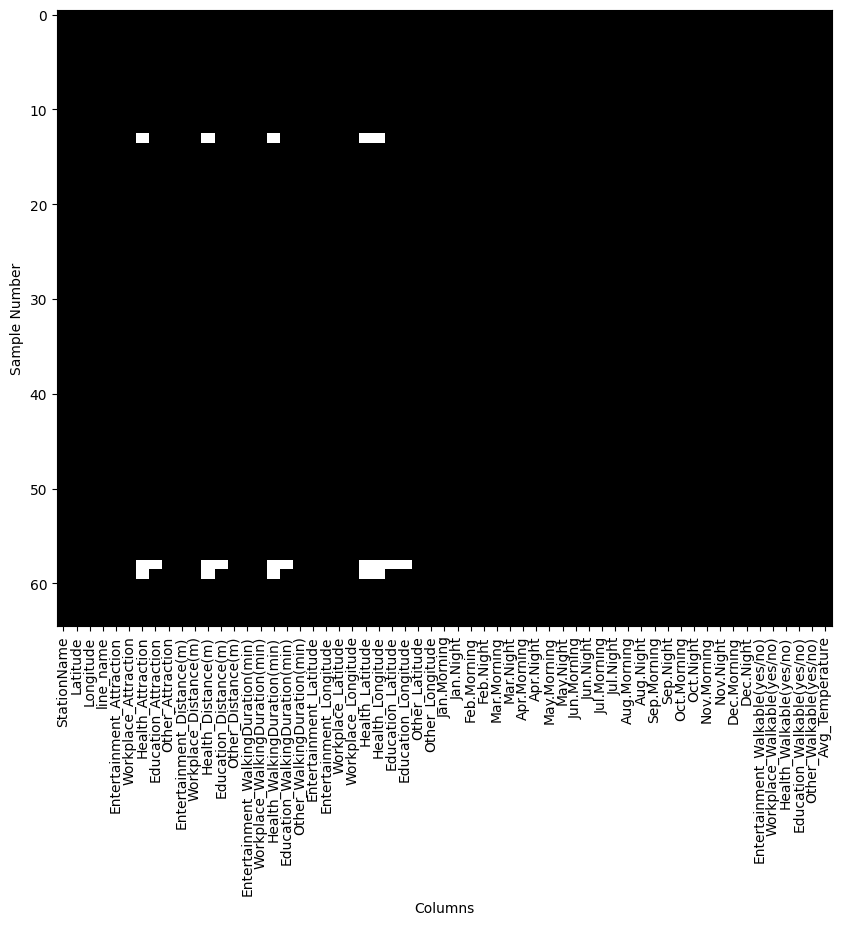

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(metro_dataset.isna(), aspect="auto", interpolation="nearest", cmap="gray")

plt.xticks(ticks=range(len(metro_dataset.columns)), labels=metro_dataset.columns, rotation=90)

plt.xlabel("Columns")
plt.ylabel("Sample Number")

plt.show()

Based on the graph, most of the dataset is complete, with a few exceptions. The missing values are primarily found in columns related to nearby attractions (such as entertainment, workplace, health, etc.), because some metro stations don't have these types of attractions nearby, leading to gaps in the data.


In [27]:
import numpy as np

metro_dataset = metro_dataset.fillna('NaN')

In [28]:
metro_dataset.to_csv('Riyadh_structured_data/riyadh_metro_stations.csv', index=False, encoding='utf-8-sig')

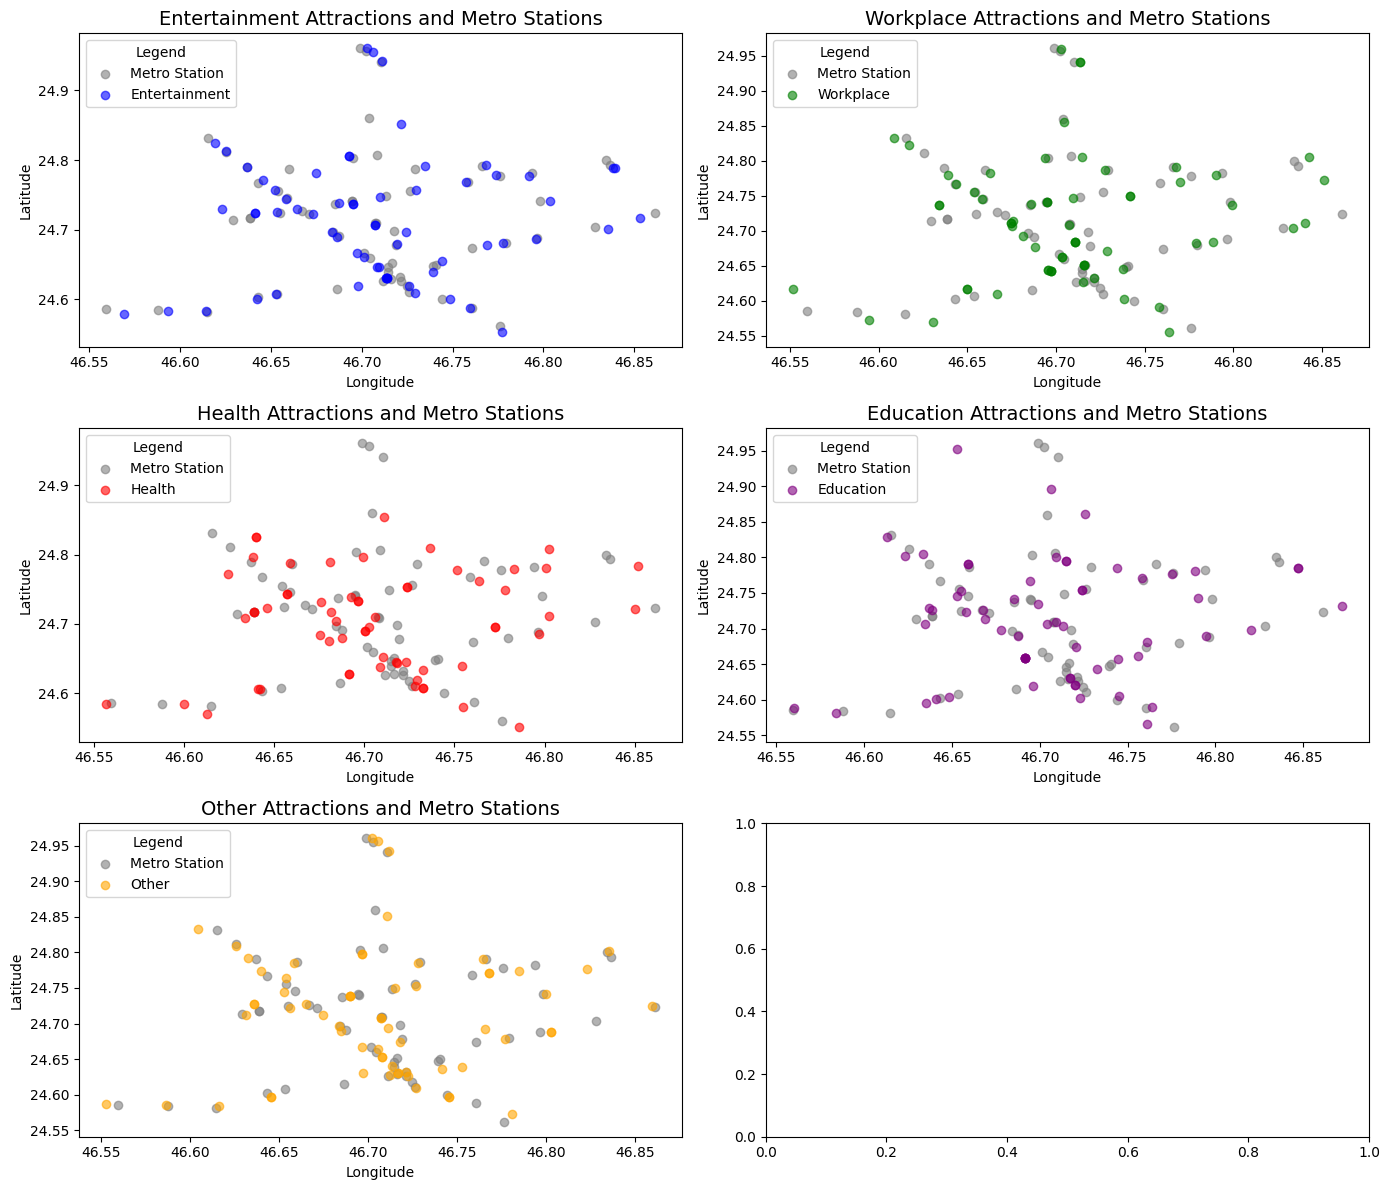

In [10]:
import matplotlib.pyplot as plt

# Define colors for each attraction type
attraction_colors = {
    "Entertainment": "blue",
    "Workplace": "green",
    "Health": "red",
    "Education": "purple",
    "Other": "orange"
}

# Define the attraction columns for each type
attraction_columns = {
    "Entertainment": ["Entertainment_Attraction", "Entertainment_Latitude", "Entertainment_Longitude"],
    "Workplace": ["Workplace_Attraction", "Workplace_Latitude", "Workplace_Longitude"],
    "Health": ["Health_Attraction", "Health_Latitude", "Health_Longitude"],
    "Education": ["Education_Attraction", "Education_Latitude", "Education_Longitude"],
    "Other": ["Other_Attraction", "Other_Latitude", "Other_Longitude"]
}

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (attraction_type, columns) in enumerate(attraction_columns.items()):
    ax = axes[idx]
    
    # Plot metro stations as red markers
    for _, row in metro_dataset.dropna(subset=['Latitude', 'Longitude']).iterrows():
        ax.scatter(row['Longitude'], row['Latitude'], c='grey', label='Metro Station' if _ == 0 else "", alpha=0.6)
    
    # Plot attractions as color-coded markers for each type
    for _, row in metro_dataset.dropna(subset=[columns[1], columns[2]]).iterrows():
        ax.scatter(row[columns[2]], row[columns[1]], c=attraction_colors[attraction_type], 
                   label=attraction_type if _ == 0 else "", alpha=0.6)
    
    ax.set_title(f"{attraction_type} Attractions and Metro Stations", fontsize=14)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
    ax.legend(title="Legend", loc='upper left', fontsize=10)

plt.tight_layout()

plt.show()


From the scatter plots, we can see how metro stations are spread in relation to different types of nearby attractions:

- **Entertainment attractions** are scattered across the area, with some places having a higher concentration than others.
- **Workplace attractions** are more concentrated in certain regions, likely where business districts and office buildings are located.
- **Health attractions** are evenly distributed, with metro stations near healthcare facilities across different parts of the area.
- **Education attractions** are mainly concentrated in the northeastern part of the map.
- **Other attractions** are spread out, though not as densely as entertainment attractions.

Overall, metro stations are fairly evenly distributed, but certain areas are more connected to specific types of attractions.

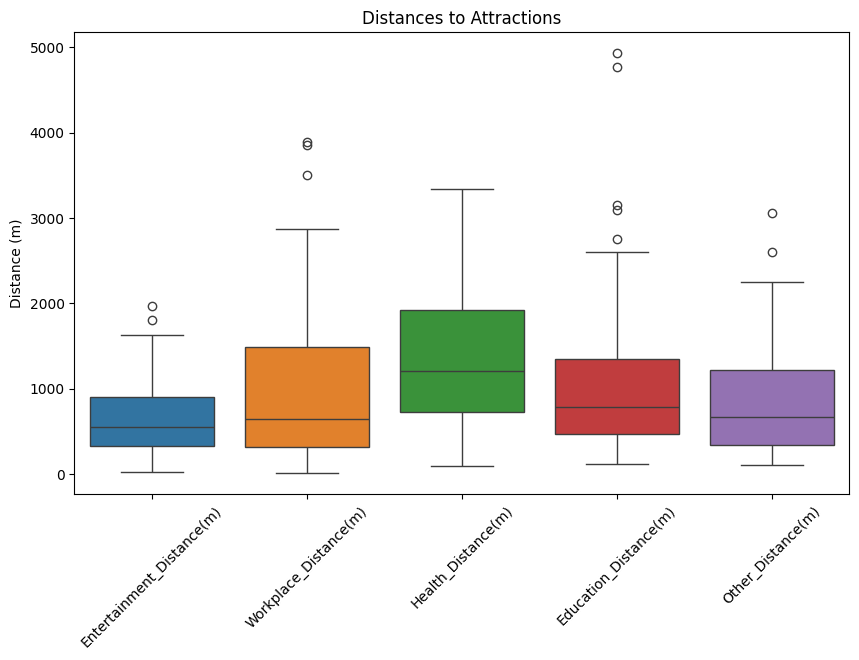

In [12]:
import seaborn as sns

# Boxplot for distances
distance_cols = ['Entertainment_Distance(m)', 'Workplace_Distance(m)', 'Health_Distance(m)',
                 'Education_Distance(m)', 'Other_Distance(m)']

plt.figure(figsize=(10, 6))
sns.boxplot(data=metro_dataset[distance_cols])
plt.title('Distances to Attractions')
plt.ylabel('Distance (m)')
plt.xticks(rotation=45)
plt.show()

### Distances to Attractions

The boxplot visualizes the distribution of distances from metro stations to various types of attractions:

- **Entertainment Attractions**:  
  Most metro stations are located within **1000 meters** of entertainment attractions. There are a few **outliers** that are situated much farther away, indicating that some stations are significantly more distant from these attractions.

- **Workplace Attractions**:  
  These attractions show a wider spread of distances, with some metro stations as far as **4000 meters** away. Several noticeable **outliers** appear at higher distances, suggesting a few stations are far from workplace-related attractions.

- **Health Attractions**:  
  Metro stations near health attractions tend to be within **2000 meters**, with no significant outliers. The distances are generally consistent across stations.

- **Education Attractions**:  
  Similar to health attractions, education-related stations are mostly within **2000 meters**, with a few **outliers** extending beyond this range, indicating that some stations are farther from educational institutions.

- **Other Attractions**:  
  Like entertainment attractions, **Other attractions** show a similar distribution, but with a few **outliers** indicating stations much farther away from these types of attractions.

### Conclusion:
Most metro stations are relatively close to **entertainment** and **health-related attractions**, while **workplace** and **education-related attractions** tend to be farther away. The presence of **outliers** across several categories suggests that some stations are much farther from certain types of attractions compared to others.


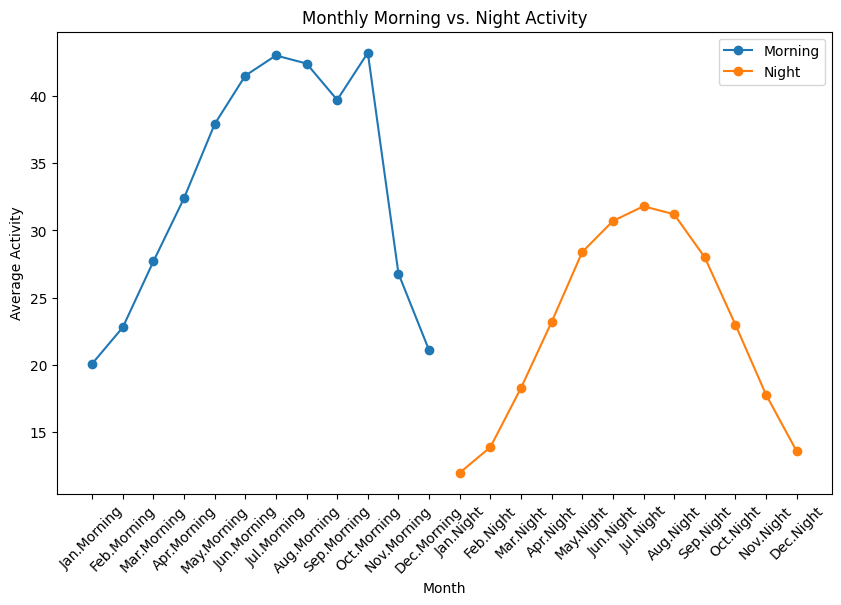

In [13]:
# Extract morning and night columns
morning_cols = [col for col in metro_dataset.columns if 'Morning' in col]
night_cols = [col for col in metro_dataset.columns if 'Night' in col]

# Calculate averages for plotting
morning_avg = metro_dataset[morning_cols].mean()
night_avg = metro_dataset[night_cols].mean()

plt.figure(figsize=(10, 6))
plt.plot(morning_cols, morning_avg, label='Morning', marker='o')
plt.plot(night_cols, night_avg, label='Night', marker='o')
plt.title('Monthly Morning vs. Night Activity')
plt.xlabel('Month')
plt.ylabel('Average Activity')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### Monthly Morning vs. Night Activity

The line chart compares the average activity levels at metro stations during the **morning** and **night** across each month:

- **Morning Activity**:  
  Activity levels are highest in **May**, gradually increasing from **January** to **May**, and then sharply decreasing towards the end of the year. The peak occurs around **May** and **June**.

- **Night Activity**:  
  Night activity starts relatively low at the beginning of the year but steadily increases, reaching its highest point in **June** and **July**. After peaking, it begins to decline gradually in the fall and winter months. Notably, **night activity** tends to stay relatively high in the summer months (June to August), suggesting more late-night activity during the warmer seasons.  
  - **November and December** see the lowest levels of night activity, which may reflect seasonal changes in commuting patterns or fewer events happening at night during colder months.

### Conclusion:
The graph shows a clear seasonal pattern, with **morning activity** peaking in the spring, while **night activity** peaks during the summer months and declines as the year progresses into the cooler months. This suggests a shift in activity patterns, with more daytime travel in warmer months and an increase in nighttime activity during summer.



Walkability Analysis Results:
     Entertainment_Walkable(yes/no)  Workplace_Walkable(yes/no)  \
No                              NaN                          12   
Yes                            65.0                          53   

     Health_Walkable(yes/no)  Education_Walkable(yes/no)  \
No                        17                          11   
Yes                       48                          54   

     Other_Walkable(yes/no)  
No                        4  
Yes                      61  


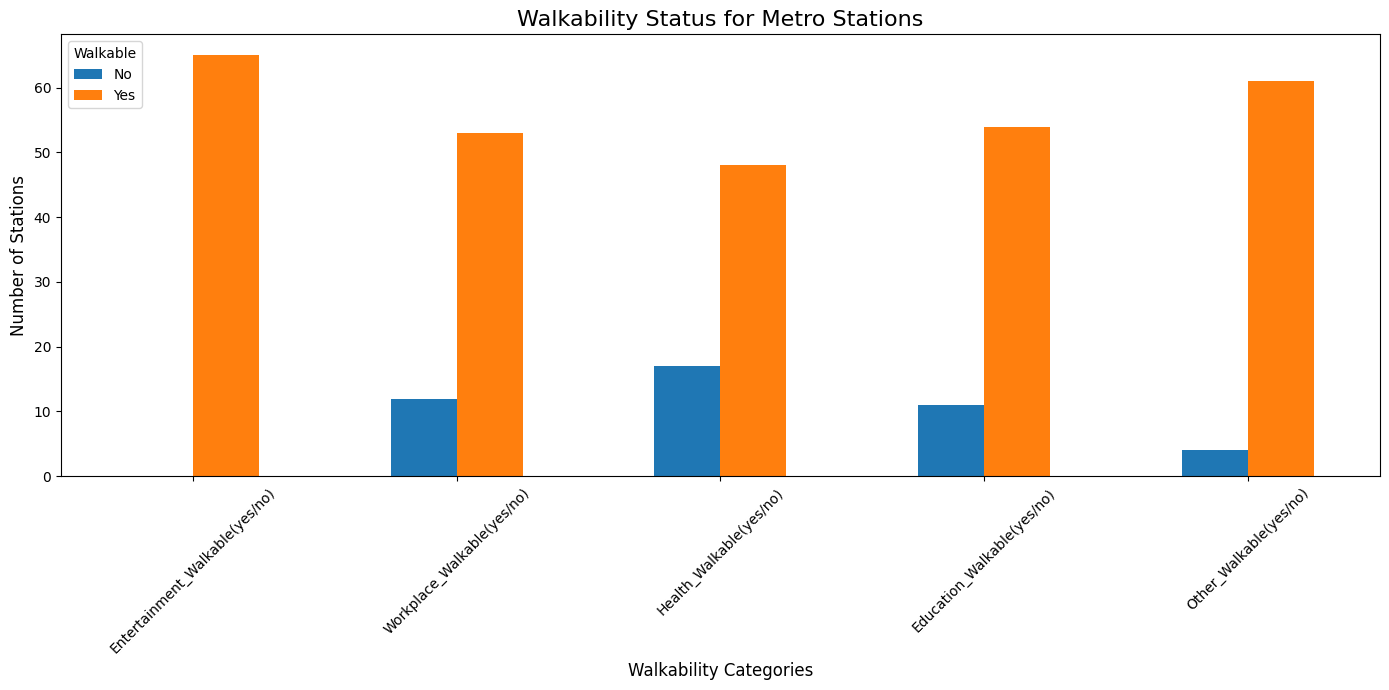

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Define walkability columns
walkability_columns = [
    "Entertainment_Walkable(yes/no)", 
    "Workplace_Walkable(yes/no)", 
    "Health_Walkable(yes/no)", 
    "Education_Walkable(yes/no)", 
    "Other_Walkable(yes/no)"
]

# Handle missing values by filling 'NaN' with 'No' for walkability columns
metro_dataset[walkability_columns] = metro_dataset[walkability_columns].fillna('No')

walkability_df = metro_dataset[walkability_columns].apply(lambda x: x.value_counts())

print("\nWalkability Analysis Results:")
print(walkability_df)

walkability_df.T.plot(kind='bar', figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])

plt.title('Walkability Status for Metro Stations', fontsize=16)
plt.ylabel('Number of Stations', fontsize=12)
plt.xlabel('Walkability Categories', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Walkable', loc='upper left')

plt.tight_layout()
plt.show()


### Walkability Status for Metro Stations

The bar chart compares the number of metro stations that are **walkable** (orange) and **not walkable** (blue) to various types of attractions:

- **Entertainment Attractions**:  
All metro stations are **walkable** (orange) to entertainment attractions, with no stations being **not walkable** (blue).
- **Workplace Attractions**:  
  The number of stations that are **walkable** (orange) to workplace attractions is much higher compared to those that are **not walkable** (blue).

- **Health Attractions**:  
  Most stations are **walkable** (orange) to health-related attractions, with fewer stations being **not walkable** (blue).

- **Education Attractions**:  
  Similar to health attractions, most stations are **walkable** (orange) to educational institutions, with only a few being **not walkable** (blue).

- **Other Attractions**:  
  A majority of stations are **walkable** (orange) to other types of attractions, with fewer being **not walkable** (blue).

### Conclusion:
The chart shows that most metro stations are **walkable** to entertainment, health, and other types of attractions, while **health** attractions have the least walkability. This indicates that accessibility to most types of attractions is quite good, especially for Entertainment and Other.


## Dataset for non-walkable attractions

In [ ]:
# Initialize an empty DataFrame to store the results
non_walkable_attractions_with_coords = pd.DataFrame()

# Define categories to filter by walkability
categories = ['Entertainment', 'Workplace', 'Health', 'Education', 'Other']

# Loop through each category to extract non-walkable attractions
for category in categories:
    walkable_column = f"{category}_Walkable(yes/no)"
    attraction_column = f"{category}_Attraction"
    latitude_column = f"{category}_Latitude"
    Longitude_column = f"{category}_Longitude"  

    # Check if the required columns exist in the dataset
    if all(col in metro_dataset.columns for col in [walkable_column, attraction_column, latitude_column, Longitude_column]):
        temp_df = metro_dataset[metro_dataset[walkable_column] == 'No'][[attraction_column, latitude_column, Longitude_column]].copy()
        temp_df = temp_df.rename(columns={
            attraction_column: 'attraction_by_bus',
            latitude_column: 'latitude',
            Longitude_column: 'Longitude'
        })

        # Append to the results DataFrame
        non_walkable_attractions_with_coords = pd.concat([non_walkable_attractions_with_coords, temp_df], ignore_index=True)

# Save the resulting dataset to a new CSV file
output_file_path = 'Riyadh_raw_data/riyadh_non_walkable_attractions_with_coords.csv'
non_walkable_attractions_with_coords.to_csv(output_file_path, index=False, encoding='utf-8-sig')

output_file_path

In [24]:
import folium

# Define the coverage radius (2000m = 2 km) for metro stations
coverage_radius = 2000  # in meters

# Define colors for each attraction type
attraction_colors = {
    "Entertainment": "blue",
    "Workplace": "green",
    "Health": "pink",
    "Education": "purple",
    "Other": "orange"
}

# Attraction columns for each type
attraction_columns = {
    "Entertainment": ["Entertainment_Attraction", "Entertainment_Latitude", "Entertainment_Longitude"],
    "Workplace": ["Workplace_Attraction", "Workplace_Latitude", "Workplace_Longitude"],
    "Health": ["Health_Attraction", "Health_Latitude", "Health_Longitude"],
    "Education": ["Education_Attraction", "Education_Latitude", "Education_Longitude"],
    "Other": ["Other_Attraction", "Other_Latitude", "Other_Longitude"]
}

# Function to calculate walking distance (approximation based on straight-line distance)
def calculate_walking_distance(lat1, lon1, lat2, lon2):
    from geopy.distance import geodesic
    distance = geodesic((lat1, lon1), (lat2, lon2)).meters  # Distance in meters
    return f"{distance:.0f} m"

# Function to generate the map with layer control
def generate_map_with_layers():
    # Create the map centered on Riyadh
    m = folium.Map(location=[24.7136, 46.6753], zoom_start=12, tiles="cartodbpositron_no_labels")

    # Add metro stations as red markers with coverage circles
    for _, row in metro_dataset.dropna(subset=['Latitude', 'Longitude']).iterrows():
        station_coords = [row['Latitude'], row['Longitude']]
        station_name = row['StationName']

        # Add pop-up for metro station
        popup_content = f"<b>Station Name:</b> {station_name}<br><b>Coverage Radius:</b> {coverage_radius} meters"
        folium.Marker(
            location=station_coords,
            popup=popup_content,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

        # Add coverage circle around metro station
        folium.Circle(
            location=station_coords,
            radius=coverage_radius,
            color='Grey',
            fill=True,
            fill_opacity=0.2
        ).add_to(m)

    # Loop through attraction types to add them as separate layers
    for attraction_type, columns in attraction_columns.items():
        attraction_layer = folium.FeatureGroup(name=attraction_type)  # Create a new layer for each type
        
        # Add attractions as color-coded markers for the specified type
        for _, row in metro_dataset.dropna(subset=[columns[1], columns[2]]).iterrows():
            attraction_coords = [row[columns[1]], row[columns[2]]]
            attraction_name = row[columns[0]]

            # Calculate walking distance to the nearest station
            distances = [
                calculate_walking_distance(row[columns[1]], row[columns[2]], station_lat, station_lon)
                for station_lat, station_lon in metro_dataset[['Latitude', 'Longitude']].dropna().values
            ]
            min_distance = min(distances, key=lambda d: float(d.split()[0]))

            # Add pop-up for attraction
            popup_content = (
                f"<b>Attraction Name:</b> {attraction_name}<br>"
                f"<b>Type:</b> {attraction_type}<br>"
                f"<b>Walking Distance to Nearest Station:</b> {min_distance}"
            )
            folium.Marker(
                location=attraction_coords,
                popup=popup_content,
                icon=folium.Icon(color=attraction_colors[attraction_type], icon='info-sign')
            ).add_to(attraction_layer)  

        attraction_layer.add_to(m)

    # Add layer control to allow toggling between different attraction types
    folium.LayerControl().add_to(m)

    map_file_path = "riyadh_metro_map_with_attractions.html"
    m.save(map_file_path)

    return map_file_path

map_path = generate_map_with_layers()

map_path

'riyadh_metro_map_with_attractions.html'